<a href="https://colab.research.google.com/github/Xylenox/CAP5610/blob/main/CAP5610_HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
import numpy as np

In [ ]:
from surprise import Dataset
from surprise import Reader

reader = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1)
data = Dataset.load_from_file('ratings_small.csv', reader=reader)

In [ ]:
from surprise.model_selection import cross_validate

In [ ]:
def average_metric(model, data):
    res = cross_validate(model, data)
#     print(res)
    return {'average_mae': np.average(res['test_mae']),
            'average_rmse': np.average(res['test_rmse']),
            'average_fit_time': np.average(res['fit_time']),
            'average_test_time': np.average(res['test_time'])}

# C

In [ ]:
from surprise import SVD
print(average_metric(SVD(biased=False), data))

{'average_mae': 0.7798378965882099, 'average_rmse': 1.010060674407946, 'average_fit_time': 2.7356422901153565, 'average_test_time': 0.11713156700134278}


In [ ]:
from surprise import KNNBasic

print(average_metric(KNNBasic(verbose=False), data))

{'average_mae': 0.7437754583814989, 'average_rmse': 0.9676999729111021, 'average_fit_time': 0.07518153190612793, 'average_test_time': 1.197641658782959}


In [ ]:
from surprise import KNNBasic

print(average_metric(KNNBasic(sim_options={'user_based': False}, verbose=False), data))

{'average_mae': 0.7208055544651335, 'average_rmse': 0.9350880624728829, 'average_fit_time': 2.474119758605957, 'average_test_time': 4.980966329574585}


# E

In [ ]:
measures = ['cosine', 'msd', 'pearson']

In [ ]:
user_mse = []
for measure in measures:
    res = average_metric(KNNBasic(sim_options={'name': measure}, verbose=False), data)
    user_mse.append(res['average_mae'])
    print(res)

{'average_mae': 0.766869008839653, 'average_rmse': 0.9924562583594744, 'average_fit_time': 0.3101259708404541, 'average_test_time': 1.23792462348938}
{'average_mae': 0.7433056512634811, 'average_rmse': 0.9672350552515647, 'average_fit_time': 0.07739453315734864, 'average_test_time': 1.2418458938598633}
{'average_mae': 0.7727279749517684, 'average_rmse': 0.9988834775514143, 'average_fit_time': 0.4608065128326416, 'average_test_time': 1.2280702590942383}


In [ ]:
item_mse = []
for measure in measures:
    res = average_metric(KNNBasic(sim_options={'name': measure, 'user_based': False}, verbose=False), data)
    item_mse.append(res['average_mae'])
    print(res)

{'average_mae': 0.7752412346973611, 'average_rmse': 0.9953623164289862, 'average_fit_time': 12.121408700942993, 'average_test_time': 5.066502618789673}
{'average_mae': 0.7206548873434995, 'average_rmse': 0.934757652737828, 'average_fit_time': 2.577119159698486, 'average_test_time': 5.198177099227905}
{'average_mae': 0.7673598808995274, 'average_rmse': 0.98802724475312, 'average_fit_time': 16.948666191101076, 'average_test_time': 5.138703060150147}


In [ ]:
user_mse

[0.766869008839653, 0.7433056512634811, 0.7727279749517684]

In [ ]:
item_mse

[0.7752412346973611, 0.7206548873434995, 0.7673598808995274]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

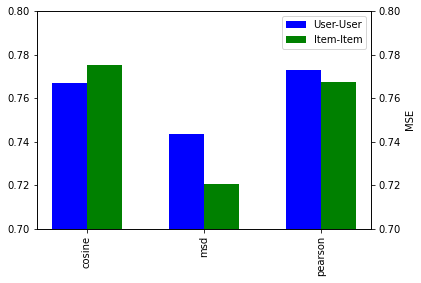

In [ ]:
x = np.arange(3)

w = 0.3

ax1 = plt.subplot(1,1,1)
ax1.set_ylim(0.7, 0.8)
plt.xticks(x + w /2, measures, rotation='vertical')

uw = ax1.bar(x, user_mse, width=w, color='b', align='center')

ax2 = ax1.twinx()
ax2.set_ylim(0.7, 0.8)
iw = ax2.bar(x + w, item_mse, width=w,color='g',align='center')


plt.ylabel('MSE')
plt.legend([uw, iw],['User-User', 'Item-Item'])

plt.savefig('e.png')

# F

In [ ]:
ks = range(25, 400, 25)

In [ ]:
list(ks)

[25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]

In [ ]:
user_ks_mse = []
for k in ks:
    res = average_metric(KNNBasic(k=k, verbose=False), data)
    user_ks_mse.append(res['average_mae'])
    print(res)

{'average_mae': 0.7393422824642153, 'average_rmse': 0.9638536297799012, 'average_fit_time': 0.07187452316284179, 'average_test_time': 1.047390079498291}
{'average_mae': 0.7459928448818882, 'average_rmse': 0.9704478325759943, 'average_fit_time': 0.07277531623840332, 'average_test_time': 1.2285968780517578}
{'average_mae': 0.7499682831160192, 'average_rmse': 0.9729800366420731, 'average_fit_time': 0.06938567161560058, 'average_test_time': 1.2553394794464112}
{'average_mae': 0.7527127622359198, 'average_rmse': 0.9763921540338003, 'average_fit_time': 0.07100930213928222, 'average_test_time': 1.3367743492126465}
{'average_mae': 0.7537889673486913, 'average_rmse': 0.976964037745916, 'average_fit_time': 0.07579069137573242, 'average_test_time': 1.3883100032806397}
{'average_mae': 0.7544549742684631, 'average_rmse': 0.9775742634538952, 'average_fit_time': 0.08260793685913086, 'average_test_time': 1.4553606510162354}
{'average_mae': 0.7545486003358565, 'average_rmse': 0.9777394723848076, 'avera

In [ ]:
item_ks_mse = []
for k in ks:
    res = average_metric(KNNBasic(sim_options={'user_based': False}, k=k, verbose=False), data)
    item_ks_mse.append(res['average_mae'])
    print(res)

{'average_mae': 0.7283857095459746, 'average_rmse': 0.9426261712879558, 'average_fit_time': 2.596321439743042, 'average_test_time': 4.803444528579712}
{'average_mae': 0.7191339249394938, 'average_rmse': 0.9336747664515492, 'average_fit_time': 2.635507869720459, 'average_test_time': 5.4387805461883545}
{'average_mae': 0.7178543049279673, 'average_rmse': 0.9314073172078292, 'average_fit_time': 2.604146718978882, 'average_test_time': 5.905649137496948}
{'average_mae': 0.7180936849152779, 'average_rmse': 0.9319318201889162, 'average_fit_time': 2.5361016273498533, 'average_test_time': 6.350568675994873}
{'average_mae': 0.7192712330530335, 'average_rmse': 0.9335070556993568, 'average_fit_time': 2.5613640785217284, 'average_test_time': 6.768917751312256}
{'average_mae': 0.7192239699752344, 'average_rmse': 0.9337340589690319, 'average_fit_time': 2.635662651062012, 'average_test_time': 7.27080454826355}
{'average_mae': 0.7200037553845147, 'average_rmse': 0.9343267219171022, 'average_fit_time': 

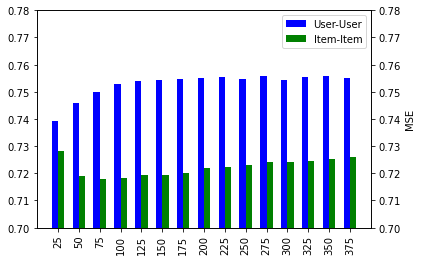

In [ ]:
x = np.arange(len(ks))

w = 0.3

ax1 = plt.subplot(1,1,1)
ax1.set_ylim(0.7, 0.78)
plt.xticks(x + w /2, ks, rotation='vertical')

uw = ax1.bar(x, user_ks_mse, width=w, color='b', align='center')

ax2 = ax1.twinx()
ax2.set_ylim(0.7, 0.78)
iw = ax2.bar(x + w, item_ks_mse, width=w,color='g',align='center')


plt.ylabel('MSE')
plt.legend([uw, iw],['User-User', 'Item-Item'])

plt.savefig('f.png')